<a href="https://colab.research.google.com/github/Kanishka-Jingar/Machine_Learning-Lab/blob/main/Assignment/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
# 1. Data Collection
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PurchaseFrequency': [7, 4, 8, 7, 6, 4, 8, 1, 5, 5],
    'AmountSpent': [20, 300, 250, 50, 130, 180, 40, 450, 280, 500],
    'Types of product purchased': [2, 2, 4, 3, 4, 2, 5, 3, 3, 1]
}

In [10]:
df = pd.DataFrame(data)

print(df.head(10))

   CustomerID  PurchaseFrequency  AmountSpent  Types of product purchased
0           1                  7           20                           2
1           2                  4          300                           2
2           3                  8          250                           4
3           4                  7           50                           3
4           5                  6          130                           4
5           6                  4          180                           2
6           7                  8           40                           5
7           8                  1          450                           3
8           9                  5          280                           3
9          10                  5          500                           1


In [36]:
# 2. Data Preprocessing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['PurchaseFrequency', 'AmountSpent', 'Types of product purchased']])

scaled_df = pd.DataFrame(scaled_features, columns=['PurchaseFrequency', 'AvgSpending', 'Types of product purchased'])
scaled_df['CustomerID'] = df['CustomerID']

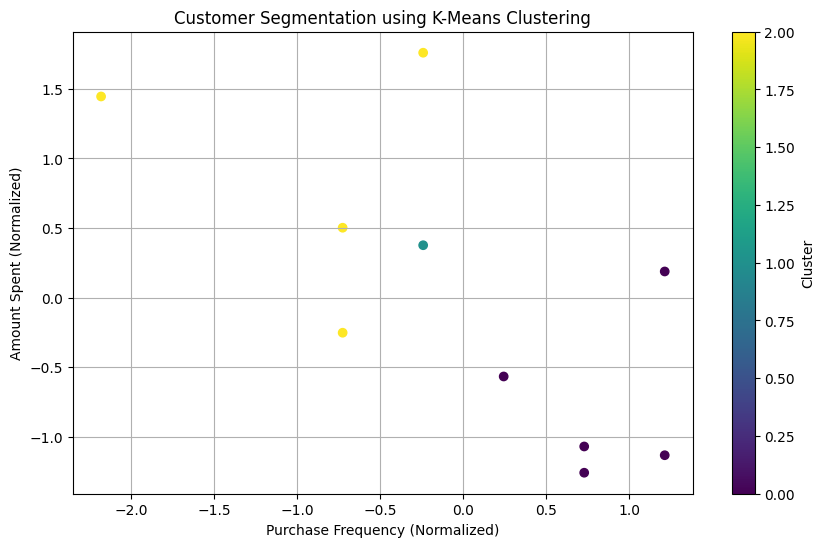

   CustomerID  PurchaseFrequency  AmountSpent  Types of product purchased  \
0           1           0.727607    -1.256893                   -0.792406   
1           2          -0.727607     0.502757                   -0.792406   
2           3           1.212678     0.188534                    0.968496   
3           4           0.727607    -1.068359                    0.088045   
4           5           0.242536    -0.565602                    0.968496   

   Cluster  ProductTypes  
0        0     -0.792406  
1        2     -0.792406  
2        0      0.968496  
3        0      0.088045  
4        0      0.968496  


In [49]:
# 3. Unsupervised Learning (K-means Clustering)
def segment_customers(df, n_clusters=3): # Defining a function to segment customers and setting default clusters to 5
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df[['PurchaseFrequency', 'AmountSpent', 'Types of product purchased']])

# Visualization of Clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PurchaseFrequency'], df['AmountSpent'], c=df['Cluster'], cmap='viridis', marker='o')
    plt.xlabel('Purchase Frequency (Normalized)')
    plt.ylabel('Amount Spent (Normalized)')
    plt.title('Customer Segmentation using K-Means Clustering')
    plt.colorbar(label='Cluster')
    plt.grid()
    plt.show()
    return df

segmented_df = segment_customers(df, n_clusters=3)
print(segmented_df.head())



In [50]:
# Calculate and print inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

# Calculate and print silhouette score
silhouette_avg = silhouette_score(df[['PurchaseFrequency', 'AmountSpent', 'Types of product purchased']], df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Printing the Cluster Analysis for dataframe
print(df)




Inertia: 12.289737974987196
Silhouette Score: -0.008930242493551094
   CustomerID  PurchaseFrequency  AmountSpent  Types of product purchased  \
0           1           0.727607    -1.256893                   -0.792406   
1           2          -0.727607     0.502757                   -0.792406   
2           3           1.212678     0.188534                    0.968496   
3           4           0.727607    -1.068359                    0.088045   
4           5           0.242536    -0.565602                    0.968496   
5           6          -0.727607    -0.251379                   -0.792406   
6           7           1.212678    -1.131203                    1.848947   
7           8          -2.182821     1.445426                    0.088045   
8           9          -0.242536     0.377068                    0.088045   
9          10          -0.242536     1.759650                   -1.672857   

   Cluster  ProductTypes  
0        0     -0.792406  
1        2     -0.792406  
2  